In [1]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv')
iris.info()
iris.head(5)
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Design Decision 1: 散点图可视化iris特征

choice 1: 直接的散点图
choice 2: 回归散点图

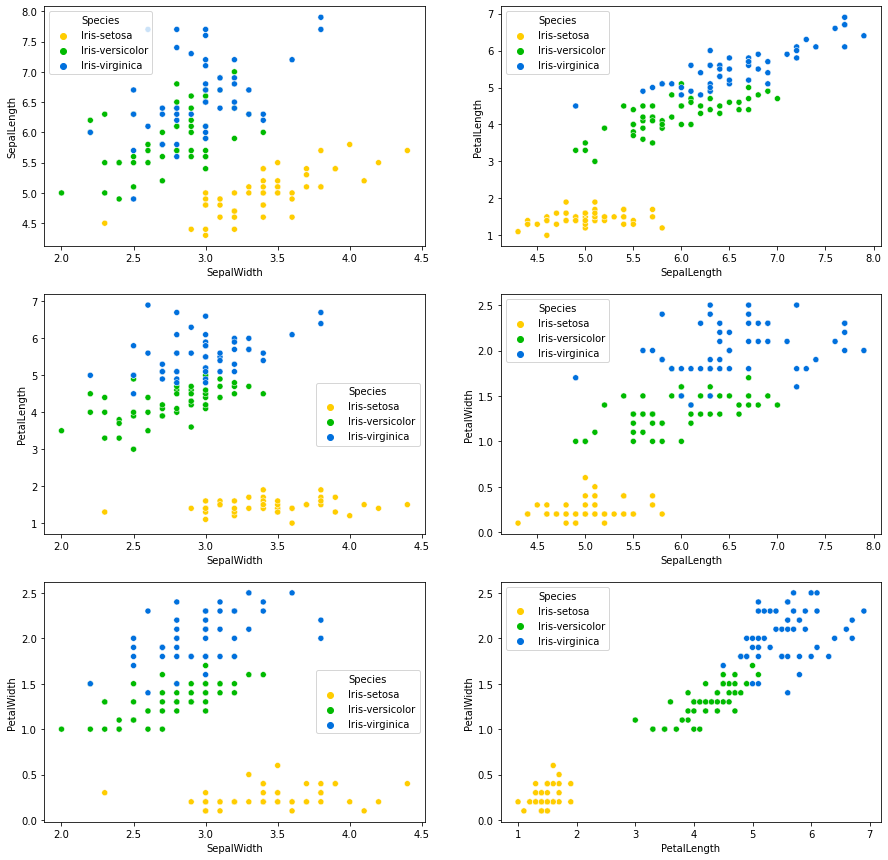

In [3]:
f, axes = plt.subplots(3, 2, figsize=(15, 15))

swsl = sns.scatterplot(data=iris, x='SepalWidth',  y='SepalLength', palette='nipy_spectral_r', hue='Species', ax = axes[0,0])
swpl = sns.scatterplot(data=iris, x='SepalWidth',  y='PetalLength', palette='nipy_spectral_r', hue='Species', ax = axes[1,0])
swpw = sns.scatterplot(data=iris, x='SepalWidth',  y='PetalWidth',  palette='nipy_spectral_r', hue='Species', ax = axes[2,0])
slpl = sns.scatterplot(data=iris, x='SepalLength', y='PetalLength', palette='nipy_spectral_r', hue='Species', ax = axes[0,1])
slpw = sns.scatterplot(data=iris, x='SepalLength', y='PetalWidth',  palette='nipy_spectral_r', hue='Species', ax = axes[1,1])
plpw = sns.scatterplot(data=iris, x='PetalLength', y='PetalWidth',  palette='nipy_spectral_r', hue='Species', ax = axes[2,1])


# Design Decision 2: 核密度估计图
choice 1: 单属性kde choice 2: 双属性kde

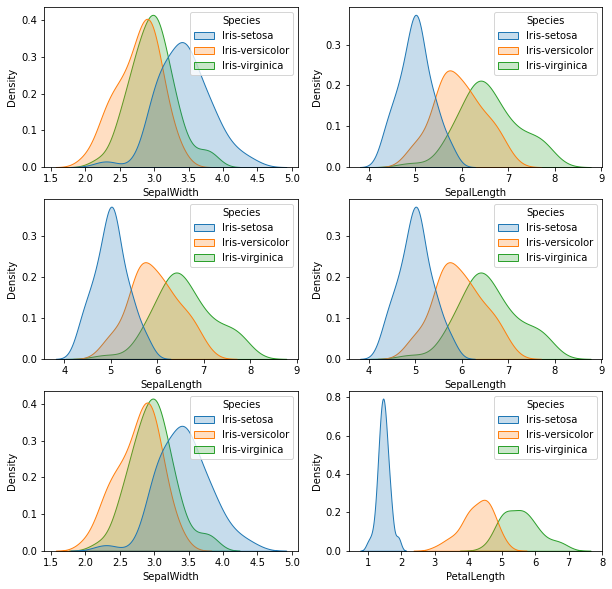

In [4]:
f, axes = plt.subplots(3, 2, figsize=(10, 10))

swsl = sns.kdeplot(data=iris, x='SepalWidth', hue='Species', ax = axes[0,0], shade=True)
swpl = sns.kdeplot(data=iris, x='SepalLength',hue='Species', ax = axes[1,0], shade=True)
swpw = sns.kdeplot(data=iris, x='SepalWidth', hue='Species', ax = axes[2,0], shade=True)
slpl = sns.kdeplot(data=iris, x='SepalLength',hue='Species', ax = axes[0,1], shade=True)
slpw = sns.kdeplot(data=iris, x='SepalLength',hue='Species', ax = axes[1,1], shade=True)
plpw = sns.kdeplot(data=iris, x='PetalLength',hue='Species', ax = axes[2,1], shade=True)

# Design Decision 3: 是否合并箱线图和琴图

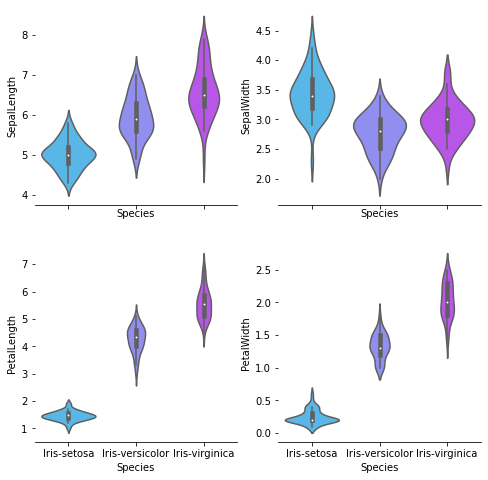

In [5]:
###琴图###
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='Species', y='SepalLength', data=iris, palette='cool', ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidth',  data=iris, palette='cool', ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLength', data=iris, palette='cool', ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidth',  data=iris, palette='cool', ax=axes[1, 1])

plt.show()

# Design Decision 4: Andrew曲线 或者 Parallel_coordinates

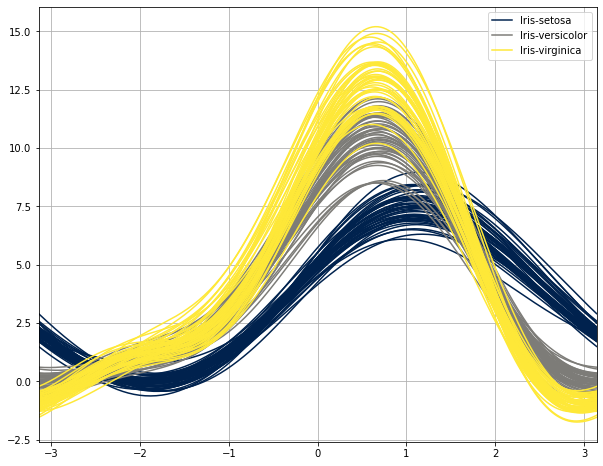

In [6]:
plt.subplots(figsize = (10,8))
pd.plotting.andrews_curves(iris, 'Species', colormap='cividis')
plt.show()

# Design Decision 5: Choose graph of central tendency estimate for numeric variables

Barplot or Pointplot can estimate central tendency for a numeric variable, besides, there is error bar for each category that indicate the uncertianty.

Explaination:
Point plots are more useful than bar plots comparisons between different levels of categorical variables. 
They are focus on showing the interactions, i.e., relationship between levels of one categorical variable changes across levels of an another categorical variable, for example, the level of sepal length in three species.
The lines that join each point from the categoriy allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

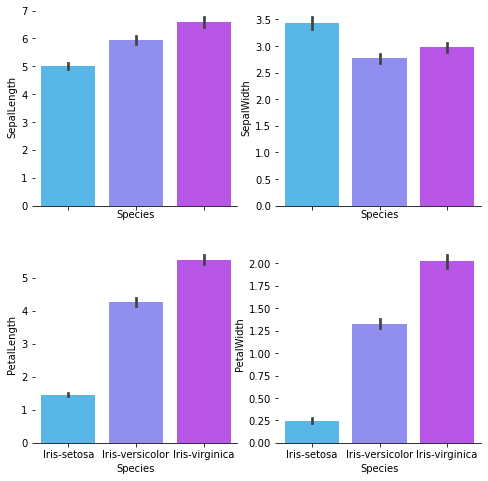

In [5]:
#bar plot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.barplot(data=iris, x='Species', y='SepalLength', palette='cool', ax=axes[0, 0])
sns.barplot(data=iris, x='Species', y='SepalWidth',  palette='cool', ax=axes[0, 1])
sns.barplot(data=iris, x='Species', y='PetalLength', palette='cool', ax=axes[1, 0])
sns.barplot(data=iris, x='Species', y='PetalWidth',  palette='cool', ax=axes[1, 1])

plt.show()

In [ ]:
####################################Not In Decisions#########################################

In [ ]:
first = alt.Chart().mark_point(filled=True,size=20).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Species:N',
).properties(
    width=150,
    height=150
).repeat(
    data = iris,
    row=['SepalLength'],
    column=['SepalWidth', 'PetalLength', 'PetalWidth']
).transform_filter(
    alt.FieldOneOfPredicate(field='Species', oneOf=['Iris-setosa', 'Iris-versicolor'])
)
#--------------------------------------------------------------------
second = alt.Chart().mark_point(filled=True,size=29).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Species:N',
).properties(
    width=150,
    height=150
).repeat(
    data = iris,
    row=['SepalWidth'],
    column=['PetalLength', 'PetalWidth']
).transform_filter(
    alt.FieldOneOfPredicate(field='Species', oneOf=['Iris-setosa', 'Iris-versicolor'])
)
#--------------------------------------------------------------------
third = alt.Chart().mark_point(filled=True,size=20).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Species:N',
).properties(
    width=150,
    height=150
).repeat(
    data = iris,
    row=['PetalLength'],
    column=['PetalWidth']
).transform_filter(
    alt.FieldOneOfPredicate(field='Species', oneOf=['Iris-setosa', 'Iris-versicolor'])
)
#--------------------------------------------------------------------
alt.vconcat(first,second,third)

# 密度预估曲线图

In [7]:
###密度预估曲线图###
alt.Chart(iris).transform_fold(
    ['PetalWidth',
     'PetalLength',
     'SepalWidth',
     'SepalLength'],
    as_ = ['Measurement_type', 'value']
).transform_density(
    density='value',
    bandwidth=0.3,
    groupby=['Measurement_type'],
    extent= [0, 8],
    counts = True,
    steps=200
).mark_area().encode(
    alt.X('value:Q'),
    alt.Y('density:Q', stack='zero'),
    alt.Color('Measurement_type:N')
).properties(width=400, height=100)

alt.Chart(...)

In [8]:
alt.Chart(iris).mark_area(interpolate='monotone').encode(
    x='SepalLength:Q',
    y='count(SepalLength):Q',
    color='Species:N',
    facet=alt.Facet('Species:N', title=None)
).transform_filter(
    alt.FieldRangePredicate(field='SepalLength', range=[0, 5.5])
).properties(width=200, height=150)

alt.Chart(...)

C:\Users\94738\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


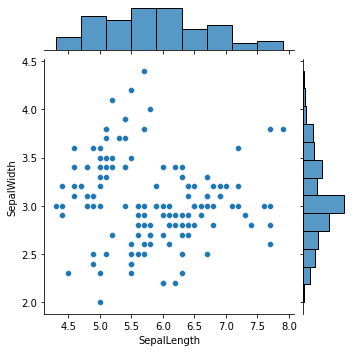

In [9]:
sns.jointplot(x="SepalLength", y="SepalWidth", data=iris, size=5)

In [ ]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

# 相关性热力图

Text(0.5, 1.0, 'Iris-setosa')

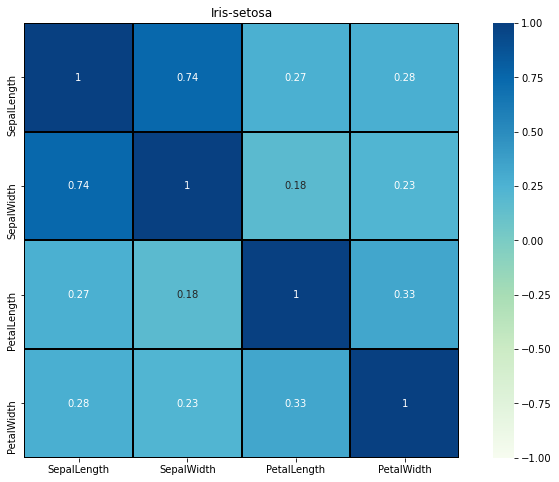

In [10]:
###相关性热力图，绝对值大的代表相关性高###
fig=plt.gcf()
fig.set_size_inches(12, 8)
fig = sns.heatmap(iris[iris['Species']=='Iris-setosa'].corr(), annot=True, cmap='GnBu', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)
fig.set_title('Iris-setosa')

# 数据分布

In [ ]:
###数据分布图###
line1 = alt.Chart(iris).mark_bar(interpolate='monotone').encode(
    x='PetalLength:Q', 
    y='count(PetalLength):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

line2 = alt.Chart(iris).mark_line(interpolate='monotone').encode(
    x='PetalWidth:Q',
    y='count(PetalWidth):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

line3 = alt.Chart(iris).mark_area(interpolate='monotone').encode(
    x='SepalLength:Q',
    y='count(SepalLength):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

line4 = alt.Chart(iris).mark_area(interpolate='monotone').encode(
    x='SepalWidth:Q',
    y='count(SepalWidth):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

alt.hconcat(line1,line2,line3,line4)